<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
from tensorflow import keras
from tensorflow.keras.applications import VGG16
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

## Step 1: Data Loading

In [2]:
base_dir = "C:\\Users\\shani\\Desktop\\Assignment"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

## Step 2:  Develop the Image Classification Models

### Model #1

#### Data augmentation

In [3]:
# Date processing
# All images will be rescaled by 1./255
img_size = 150
batchsize = 256

train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_data_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2)

train_data = train_data_generator.flow_from_directory(
    train_dir,
    target_size = (img_size, img_size),
    batch_size = batchsize,
    class_mode = 'categorical',
    subset = 'training')

val_data = test_data_generator.flow_from_directory(
    validation_dir,
    target_size = (img_size, img_size),
    batch_size = batchsize,
    class_mode='categorical',
    subset = 'validation')

Found 7500 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


#### Build model

In [7]:
# Build the Model

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0002)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0002)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.Adam(learning_rate = 0.0002) ,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 conv2d_10 (Conv2D)          (None, 70, 70, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 33, 33, 128)      

In [10]:
# Train the Model
epochs=100
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
  batch_size=batchsize,
)

Epoch 1/100
30/30 [==============================] - 222s 7s/step - loss: 2.4836 - accuracy: 0.1109 - val_loss: 2.3928 - val_accuracy: 0.1700
Epoch 2/100
30/30 [==============================] - 210s 7s/step - loss: 2.3501 - accuracy: 0.1657 - val_loss: 2.2468 - val_accuracy: 0.1875
Epoch 3/100
30/30 [==============================] - 213s 7s/step - loss: 2.2465 - accuracy: 0.2005 - val_loss: 2.1604 - val_accuracy: 0.2850
Epoch 4/100
30/30 [==============================] - 211s 7s/step - loss: 2.0978 - accuracy: 0.2845 - val_loss: 1.9444 - val_accuracy: 0.3500
Epoch 5/100
30/30 [==============================] - 212s 7s/step - loss: 1.9553 - accuracy: 0.3365 - val_loss: 1.8478 - val_accuracy: 0.4125
Epoch 6/100
30/30 [==============================] - 208s 7s/step - loss: 1.8726 - accuracy: 0.3735 - val_loss: 1.7552 - val_accuracy: 0.4150
Epoch 7/100
30/30 [==============================] - 211s 7s/step - loss: 1.8378 - accuracy: 0.3967 - val_loss: 1.7367 - val_accuracy: 0.4400
Epoch 

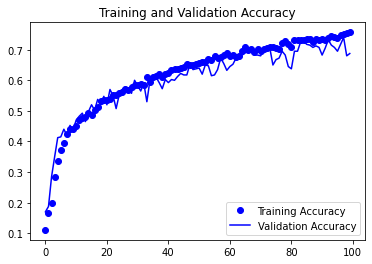

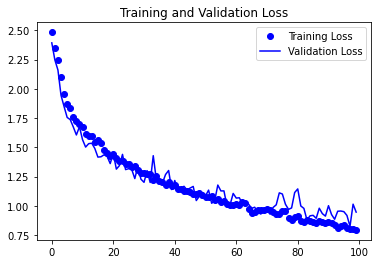

In [11]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.plot(epochs_range, acc, 'bo', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.figure()


plt.plot(epochs_range, loss,'bo', label='Training Loss')
plt.plot(epochs_range, val_loss,'b', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
# Save the Model
model.save('food_model_1.h5')

### Model #2 (pre trained model)

#### Data augmentation

In [32]:
batchsize = 256
img_size = 150

train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_data_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2)

train_data = train_data_generator.flow_from_directory(
    train_dir,
    target_size = (img_size, img_size),
    batch_size = batchsize,
    class_mode = 'categorical',
    subset = 'training')

val_data = test_data_generator.flow_from_directory(
    validation_dir,
    target_size = (img_size, img_size),
    batch_size = batchsize,
    class_mode='categorical',
    subset = 'validation')

Found 7500 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


#### Build model

In [33]:
# Build the Model
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [34]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv3':
        set_trainable = True # after black5_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
             

In [35]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0002)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0002)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_11 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 10)               

In [36]:

model.compile(optimizer=optimizers.Adam(learning_rate = 0.0002) ,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=30,
  batch_size= batchsize
)

Epoch 1/30
30/30 [==============================] - 237s 8s/step - loss: 2.3474 - accuracy: 0.2171 - val_loss: 1.8282 - val_accuracy: 0.5000
Epoch 2/30
30/30 [==============================] - 231s 8s/step - loss: 1.8669 - accuracy: 0.4032 - val_loss: 1.3938 - val_accuracy: 0.6075
Epoch 3/30
30/30 [==============================] - 229s 8s/step - loss: 1.5980 - accuracy: 0.5015 - val_loss: 1.2183 - val_accuracy: 0.6300
Epoch 4/30
30/30 [==============================] - 264s 9s/step - loss: 1.4521 - accuracy: 0.5557 - val_loss: 1.0726 - val_accuracy: 0.6925
Epoch 5/30
30/30 [==============================] - 269s 9s/step - loss: 1.3257 - accuracy: 0.5964 - val_loss: 1.0458 - val_accuracy: 0.6850
Epoch 6/30
30/30 [==============================] - 274s 9s/step - loss: 1.2657 - accuracy: 0.6141 - val_loss: 0.9794 - val_accuracy: 0.7250
Epoch 7/30
30/30 [==============================] - 274s 9s/step - loss: 1.2078 - accuracy: 0.6357 - val_loss: 0.9308 - val_accuracy: 0.7175
Epoch 8/30
30

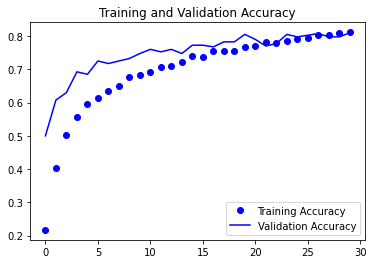

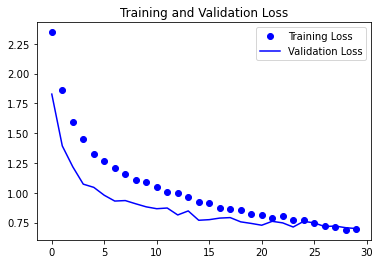

In [37]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.plot(epochs_range, acc, 'bo', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.figure()


plt.plot(epochs_range, loss,'bo', label='Training Loss')
plt.plot(epochs_range, val_loss,'b', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
# Save the Model
model.save('food_model_2.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [13]:
# Model #1
model1 = keras.models.load_model('food_model_1.h5')
test_generator = test_data_generator.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

lossAvg = 0
accAvg = 0

for i in range(5):
    test_loss, test_acc = model1.evaluate(test_generator, steps=7)
    print('loss:', test_loss,'test acc:', test_acc)
    lossAvg += test_loss
    accAvg += test_acc
    i += 1
    
print('\n',lossAvg/5, accAvg/5)

Found 500 images belonging to 10 classes.
7/7 [==============================] - 1s 129ms/step - loss: 0.9979 - accuracy: 0.6857
loss: 0.9979463815689087 test acc: 0.6857143044471741
7/7 [==============================] - 1s 126ms/step - loss: 1.1298 - accuracy: 0.6500
loss: 1.129840612411499 test acc: 0.6499999761581421
7/7 [==============================] - 1s 123ms/step - loss: 1.0599 - accuracy: 0.6571
loss: 1.0598700046539307 test acc: 0.6571428775787354
7/7 [==============================] - 1s 128ms/step - loss: 1.0457 - accuracy: 0.6857
loss: 1.0456565618515015 test acc: 0.6857143044471741
7/7 [==============================] - 1s 134ms/step - loss: 0.9817 - accuracy: 0.6571
loss: 0.981706440448761 test acc: 0.6571428775787354

 1.04300400018692 0.6671428680419922


In [17]:
# Model #2
model2 = keras.models.load_model('food_model_2.h5')

test_generator = test_data_generator.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

lossAvg = 0
accAvg = 0

for i in range(5):
    test_loss, test_acc = model2.evaluate(test_generator, steps=7)
    print('loss:', test_loss,'test acc:', test_acc)
    lossAvg += test_loss
    accAvg += test_acc
    i += 1
    
print('\n',lossAvg/5, accAvg/5)

Found 500 images belonging to 10 classes.
7/7 [==============================] - 5s 618ms/step - loss: 0.7626 - accuracy: 0.8214
loss: 0.7626169323921204 test acc: 0.8214285969734192
7/7 [==============================] - 4s 609ms/step - loss: 0.6016 - accuracy: 0.8429
loss: 0.6015574336051941 test acc: 0.8428571224212646
7/7 [==============================] - 4s 611ms/step - loss: 0.7908 - accuracy: 0.8286
loss: 0.790752649307251 test acc: 0.8285714387893677
7/7 [==============================] - 4s 601ms/step - loss: 0.7933 - accuracy: 0.7857
loss: 0.7932831048965454 test acc: 0.7857142686843872
7/7 [==============================] - 4s 592ms/step - loss: 0.8166 - accuracy: 0.8000
loss: 0.8165910840034485 test acc: 0.800000011920929

 0.7529602408409118 0.8157142877578736


In [18]:
# Save the best model


model2.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [19]:
# Load the model
model = keras.models.load_model('food_model_best.h5')

In [20]:
# Load the food list (in alphabetical order)
with open('79.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['apple_pie', 'crab_cakes', 'dumplings', 'edamame', 'falafel', 'lobster_bisque', 'mussels', 'pad_thai', 'red_velvet_cake', 'risotto']


In [21]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

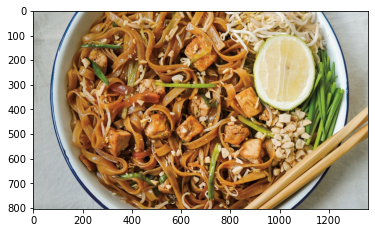

The prediction is:  pad_thai 

    apple_pie  crab_cakes  dumplings   edamame   falafel  lobster_bisque  \
0   0.000002    0.000188   0.000026  0.000023  0.000004        0.000015   

    mussels  pad_thai  red_velvet_cake   risotto  
0  0.000005  0.999414     6.173513e-08  0.000322  


In [22]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'padthai.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

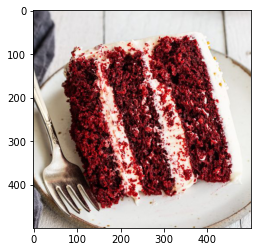

The prediction is:  red_velvet_cake 

       apple_pie    crab_cakes     dumplings       edamame       falafel  \
0  1.261273e-09  9.807150e-11  1.255404e-11  1.178654e-12  1.548988e-10   

   lobster_bisque       mussels      pad_thai  red_velvet_cake       risotto  
0    1.439715e-10  6.284569e-10  6.371670e-12              1.0  2.093375e-10  


In [23]:
# Make prediction for the image you downloaded from internet

img = 'rv.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

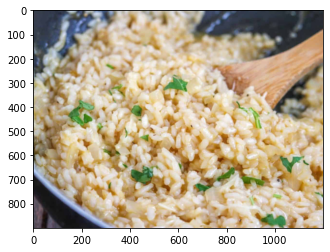

The prediction is:  risotto 

    apple_pie    crab_cakes  dumplings   edamame   falafel  lobster_bisque  \
0   0.000175  9.477391e-07   0.000003  0.000001  0.000005        0.000046   

    mussels  pad_thai  red_velvet_cake   risotto  
0  0.000012  0.000032         0.000043  0.999683  


In [24]:
# Make prediction for the image you downloaded from internet

img = 'risotto.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

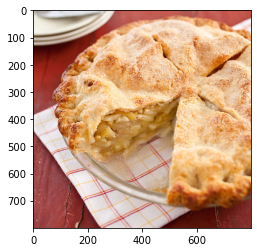

The prediction is:  apple_pie 

    apple_pie    crab_cakes  dumplings       edamame   falafel  lobster_bisque  \
0    0.99994  1.639075e-07   0.000054  7.365741e-09  0.000004    5.540044e-08   

        mussels      pad_thai  red_velvet_cake       risotto  
0  9.070369e-10  4.979169e-07     4.904252e-07  6.992065e-07  


In [25]:
img = 'applepie.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

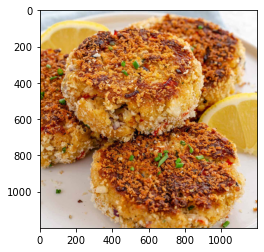

The prediction is:  crab_cakes 

    apple_pie  crab_cakes     dumplings       edamame   falafel  \
0   0.000001    0.726983  5.952044e-08  1.194024e-09  0.273013   

   lobster_bisque       mussels      pad_thai  red_velvet_cake   risotto  
0    8.161726e-09  2.795506e-07  5.424152e-07     3.838321e-08  0.000001  


In [26]:
img = 'crabcake.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

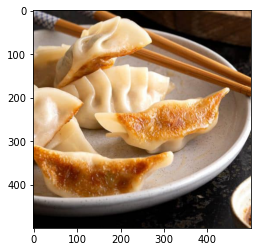

The prediction is:  dumplings 

    apple_pie  crab_cakes  dumplings       edamame   falafel  lobster_bisque  \
0   0.000877    0.000002   0.996751  5.538635e-07  0.002276        0.000093   

        mussels      pad_thai  red_velvet_cake       risotto  
0  2.498087e-07  7.635396e-07     2.861477e-07  2.488158e-07  


In [28]:
img = 'dumpling.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

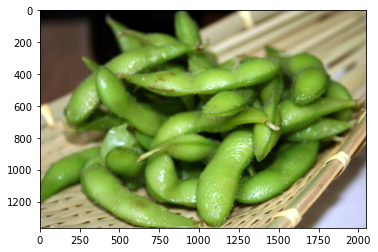

The prediction is:  edamame 

       apple_pie    crab_cakes     dumplings  edamame       falafel  \
0  6.870301e-15  1.744490e-13  1.076247e-12      1.0  6.669758e-14   

   lobster_bisque       mussels      pad_thai  red_velvet_cake       risotto  
0    2.043212e-15  1.125293e-12  8.660194e-15     1.631316e-16  1.407368e-14  


In [29]:
img = 'edamame.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

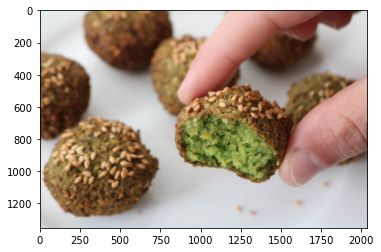

The prediction is:  falafel 

       apple_pie  crab_cakes     dumplings       edamame   falafel  \
0  5.807430e-13    0.000045  5.636247e-11  2.003660e-12  0.999955   

   lobster_bisque       mussels      pad_thai  red_velvet_cake       risotto  
0    9.458735e-13  2.251472e-10  7.608481e-11     3.416352e-12  6.494419e-09  


In [30]:
img = 'falafel.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

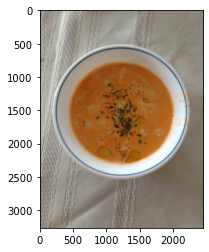

The prediction is:  lobster_bisque 

       apple_pie    crab_cakes     dumplings       edamame       falafel  \
0  5.659870e-10  1.131914e-10  5.545732e-10  4.077289e-10  4.720672e-10   

   lobster_bisque       mussels      pad_thai  red_velvet_cake       risotto  
0             1.0  3.242039e-12  1.973916e-11     7.237079e-11  2.122315e-09  


In [31]:
img = 'lobsterbisque.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

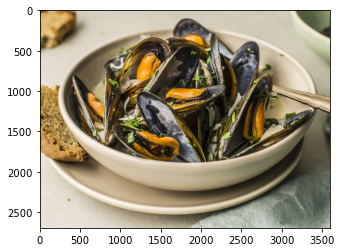

The prediction is:  mussels 

       apple_pie  crab_cakes     dumplings   edamame       falafel  \
0  4.004112e-07    0.000008  9.507956e-07  0.000022  4.289174e-09   

   lobster_bisque   mussels  pad_thai  red_velvet_cake       risotto  
0        0.000002  0.999678  0.000289     1.065126e-07  5.279664e-07  


In [32]:
img = 'mussels.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)